<a href="https://colab.research.google.com/github/roshan457kumar/project/blob/main/vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import heapq
from heapq import heappop, heappush



In [ ]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

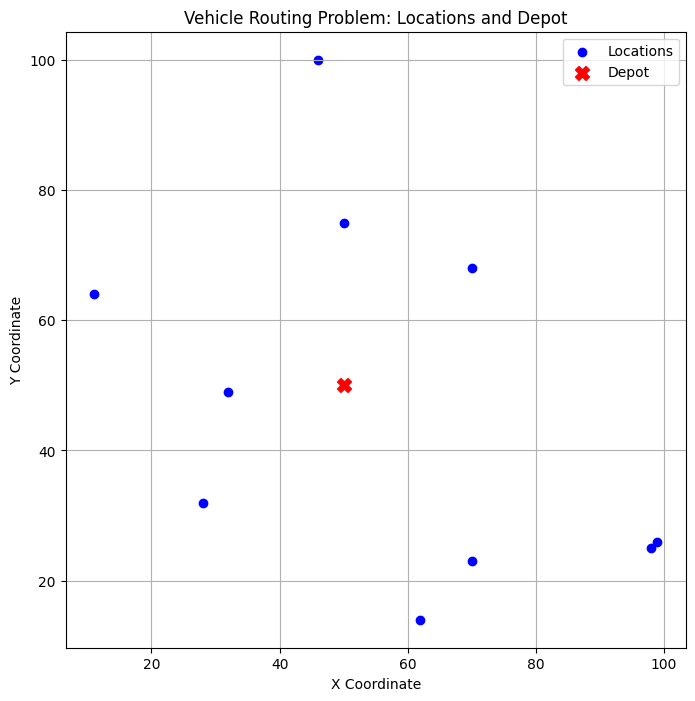

In [ ]:
plt.figure(figsize=(8, 8))
x_coords, y_coords = zip(*locations)
plt.scatter(x_coords, y_coords, c="blue", label="Locations")
plt.scatter(*depot, c="red", label="Depot", s=100, marker="X")
plt.title("Vehicle Routing Problem: Locations and Depot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalVRPHeap(individual):
    total_distance = 0
    heap = []
    distances = [0] * num_vehicles
    for i in range(num_vehicles):
      heapq. heappush(heap, (0, i))
    routes = [[] for _ in range(num_vehicles)]
    for loc_index in individual:
        loc = locations[loc_index]
        current_distance, vehicle_idx = heappop(heap)
        if routes[vehicle_idx]:
            last_location = routes[vehicle_idx][-1]
        else:
            last_location = depot
        added_distance = np.linalg.norm(np.array(last_location) - np.array(loc))
        current_distance += added_distance
        distances[vehicle_idx] += added_distance
        routes[vehicle_idx].append(loc)
        heappush(heap, (current_distance, vehicle_idx))
    for i in range(num_vehicles):
        if routes[i]:
            last_location = routes[i][-1]
            distances[i] += np.linalg.norm(np.array(last_location) - np.array(depot))
    total_distance = sum(distances)
    balance_penalty = np.std(distances)
    return total_distance + 10 * balance_penalty,


In [ ]:
toolbox.register("evaluate", evalVRPHeap)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	814.218	533.282
1  	218   	762.59 	449.109
2  	240   	747.564	449.109
3  	240   	735.238	449.109
4  	233   	728.153	449.109
5  	229   	714.258	449.109
6  	222   	710.182	480.104
7  	239   	722.506	447.319
8  	226   	721.676	447.319
9  	239   	710.233	447.319
10 	233   	713.111	447.319
11 	229   	692.408	447.319
12 	229   	694.227	444.921
13 	227   	688.499	447.319
14 	207   	690.722	447.319
15 	233   	677.232	447.319
16 	227   	662.69 	447.319
17 	228   	652.268	447.319
18 	243   	640.727	447.319
19 	237   	617.661	445.627
20 	238   	593.263	445.627
21 	242   	551.897	447.319
22 	224   	514.574	445.627
23 	238   	518.703	443.392
24 	221   	525.492	443.392
25 	234   	530.116	443.392
26 	221   	537.685	443.392
27 	229   	562.848	443.392
28 	217   	553.473	443.392
29 	247   	538.561	443.392
30 	233   	505.381	443.392
Best Individual:  [0, 8, 9, 5, 2, 6, 4, 7, 1, 3]
Best Fitness:  443.39177315975536


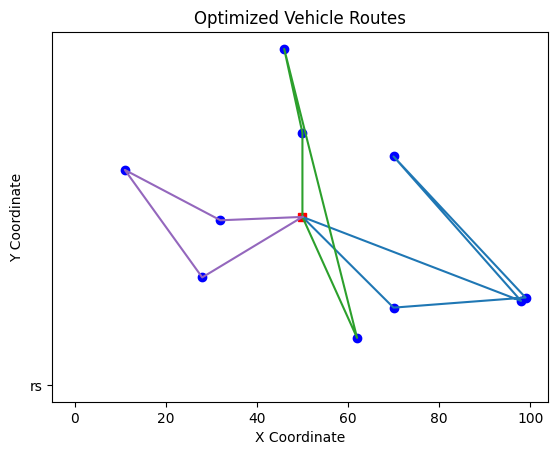

In [ ]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()

    # Print results
    print("Best Individual: ", hof[0])
    print("Best Fitness: ", hof[0].fitness.values[0])

    # Plot the best solution
    plot_routes(hof[0], title="Optimized Vehicle Routes")